<a href="https://colab.research.google.com/github/AbdulxoliqMirzayev/Matrix_Determinant/blob/main/Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ushbu kodda men NxN o‘lchamdagi matritsaning determinanti va inversini hisoblashni NOLDAN amalga oshirdim  yani hech qanday kutubxonadan foydalanmasdan o‘z funksiyalarim orqali

Maqsad: chiziqli algebra asoslarini amalda tushunish va algoritmik fikrlash     ko‘nikmasini mustahkamlash.

Bu yondashuv: har bir bosqichni qo‘lda yozish orqali determinat, minor, kofaktor va transpozitsiya kabi tushunchalarni chuqur o‘rganishga yordam beradi.

Junior dasturchi sifatida bu menga matematik model asosida real algoritm yozishni va har bir element qanday hisoblanishini to‘liq anglashimda yordam berdi !!!

Batafsil o'rganish uchun quyidagi link orqali o'tib o'rganishingiz mumkin ->
https://en.wikipedia.org/wiki/Determinant


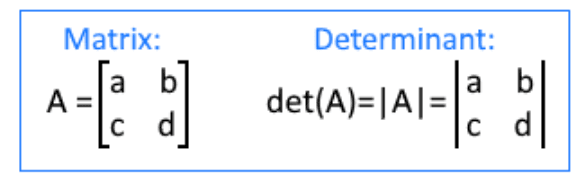

In [32]:
# Matritsa uchun determinant va invers matritsa hisoblovchi kod
# minor matritsa olish funksiyasi

def minor_matritsa(matritsa, qator, ustun):
    new_m = []
    for i in range(len(matritsa)):
        if i != qator:
            yangi_qator = []
            for j in range(len(matritsa)):
                if j != ustun:
                    yangi_qator.append(matritsa[i][j])
            new_m.append(yangi_qator)
    return new_m

In [33]:
# Determinantni topish funksiyasi

def determinant(matritsa):
    n = len(matritsa)

    # 1x1 matritsa uchun
    if n == 1:
        return matritsa[0][0]

    # 2x2 matritsa uchun formuladan foydalanamiz: ad - bc
    if n == 2:
        return matritsa[0][0]*matritsa[1][1] - matritsa[0][1]*matritsa[1][0]

    # Katta matritsalar uchun rekursiv hisoblaymiz
    results = 0
    for j in range(n):
        dots = (-1) ** j  # Belgilar ketma ketligi
        small = minor_matritsa(matritsa, 0, j)  # 0-qatordan minor olamiz
        results += dots * matritsa[0][j] * determinant(small)
    return results



In [34]:
# Matritsani aylantirish qator va ustunni almashtirish

def rotate(matritsa):
    n = len(matritsa)
    result = []
    for i in range(n):
        new_qator = []
        for j in range(n):
            new_qator.append(matritsa[j][i])
        result.append(new_qator)
    return result


In [35]:
# Har bir element uchun kofaktor hisoblash

def kofaktorlar(matritsa):
    n = len(matritsa)
    results1 = []
    for i in range(n):
        row1 = []
        for j in range(n):
            smalls = minor_matritsa(matritsa, i, j)  # Minor olamiz
            belgi = (-1) ** (i + j)  # Kofaktor belgisi
            row1.append(belgi * determinant(smalls))
        results1.append(row1)
    return results1


In [36]:
# Invers matritsani hisoblaymiz

def invers(matritsa):
    det = determinant(matritsa)  # avval determinant topamiz
    if det == 0:
        return None  # agar nol bolsa  invers yoq

    kof = kofaktorlar(matritsa)         # Kofaktor matritsa
    adj = rotate(kof)                # Adjugate aylantirilgan kofaktor

    # har bir elementni determinantga bolamiz
    results2 = []
    for qator in adj:
        neww_qator = []
        for son in qator:
            neww_qator.append(son / det)
        results2.append(neww_qator)

    return results2


In [37]:
# ===== TEST QILAMIZ ===== #

# 3x3 matritsa yaratamiz
matritsa = [
    [2, 1, 3],
    [1, 0, 2],
    [4, 1, 8]
]

# Matritsani chiqaramiz
print("Matritsa:")
for qator in matritsa:
    print(qator)


Matritsa:
[2, 1, 3]
[1, 0, 2]
[4, 1, 8]


In [38]:
# Determinantni chiqaramiz
print("\n Determinant:", determinant(matritsa))



 Determinant: -1


In [39]:
# Inversni hisoblaymiz

inv = invers(matritsa)
if inv:
    print("\n Invers matritsa:")
    for qator in inv:
        print([round(x, 2) for x in qator])  # Yaxlitlab chiqaramiz
else:
    print("\n Bu matritsaning inversi yo‘q (det = 0)")


 Invers matritsa:
[2.0, 5.0, -2.0]
[-0.0, -4.0, 1.0]
[-1.0, -2.0, 1.0]


Qatorlar qanday mano beradi ?

Har bir qator  bu yangi matritsadagi transformatsiya natijasi:

1-qator: [2.0, 5.0, -2.0]

2-qator: [-0.0, -4.0, 1.0]

3-qator: [-1.0, -2.0, 1.0]

Bu qiymatlar:

Minorlar kofaktorlar va adjugat orqali chiqqan

Har biri 1 / determinant ga kopaytirilgan